In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv('Advertising.csv')

In [3]:
a.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
k=a.drop('Unnamed: 0',axis=1)
k.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


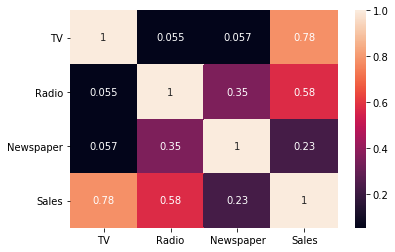

In [5]:
sns.heatmap(k.corr(),annot=True)

In [6]:
x=k['Radio']
y=k['Sales']
from sklearn.linear_model import LinearRegression
linreg2=LinearRegression()
linreg2.fit(pd.DataFrame(x),y)
print(linreg2.intercept_)
print(linreg2.coef_)
k['predicted']=linreg2.predict(pd.DataFrame(x))
ypredicted=k['predicted']

from sklearn import metrics
print(linreg2.score(pd.DataFrame(x),y))#r2 value
sse=sum((k['Sales']-k['predicted'])**2)
rmse=np.sqrt(sse/len(k.Sales))
rmse      

9.311638095158283
[0.20249578]
0.33203245544529525


4.253515927456418

In [9]:
x1=k[['Radio','TV','Newspaper']]
y=k['Sales']
from sklearn.linear_model import LinearRegression
linreg2=LinearRegression()
linreg2.fit(pd.DataFrame(x1),y)
print(linreg2.intercept_)
print(linreg2.coef_)
k['predicted']=linreg2.predict(pd.DataFrame(x1))
ypredicted=k['predicted']

from sklearn import metrics
print(linreg2.score(pd.DataFrame(x1),y))#r2 value
sse=sum((k['Sales']-k['predicted'])**2)
rmse=np.sqrt(sse/len(k.Sales))
rmse      

2.9388893694594067
[ 0.18853002  0.04576465 -0.00103749]
0.8972106381789521


1.6685701407225697

In [15]:
import statsmodels.formula.api as smf

In [48]:
m1=smf.ols('Sales~TV',k).fit()
m2=smf.ols('Sales~Radio',k).fit()
m3=smf.ols('Sales~Newspaper',k).fit()
m4=smf.ols('Sales~TV+Radio',k).fit()
m5=smf.ols('Sales~TV+Newspaper',k).fit()
m6=smf.ols('Sales~Radio+Newspaper',k).fit()
m7=smf.ols('Sales~TV+Newspaper+Radio',k).fit()

In [45]:
m3

In [49]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.83e-98
Time:                        12:23:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
k['tvradio']=k['TV']*k['Radio']


In [18]:
m8=smf.ols('Sales~TV+Radio+tvradio',k).fit()

In [19]:
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          6.68e-146
Time:                        18:25:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
tvradio        0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
m8.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
tvradio      0.001086
dtype: float64

In [23]:
y7_predict=m8.params[0]+m8.params[1]+m8.params[2]+m8.params[3]

In [24]:
y7_predict

6.799268111504132